<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80(%EB%B6%84%EB%A5%98)_%ED%95%99%EC%83%9D_%EC%84%B1%EC%A0%81_%EC%98%88%EC%B8%A1_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'chasaem'
os.environ['KAGGLE_KEY'] = 'e3dda6dc4ee9d517bb5226aacacae510'

!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 10.4MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# gender : 성별(M: 남, F: 여)
# Nationality : 국적
# PlaceofBirth : 출생국가
# StageID : 학교(초, 중, 고)
# GradeID : 성적 등급
# SectionID : 반 이름
# Topic: 수강 과목
# Semester : 수강한 학기 (1학기/ 2학기)
# Relation : 주 보호자와 학생의 관계
# raisedhands : 수업중 손을 든 횟수
# VisitedResources: 학생이 교과 과정을 방문한 횟수
# AnnouncementsView: 학생이 과목 공지사항을 방문한 횟수
# Discussion : 학생이 토론에 참여한 횟수
# ParentAnsweringSurvey : 부모가 학교 설문에 참여했는지 여부
# ParentschoolSatisfaction : 부모가 학교에 만족했는지 여부
# StudentAbscenceDays : 학생의 결석 횟수(7회 이상/미만)
# Class : 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)


In [3]:
# 1. 판다스로 데이터 읽어오기
edu = pd.read_csv('/content/xAPI-Edu-Data.csv')



In [4]:

# 2. 데이터의 개수, 데이터 타입, 결측치 확인
edu.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
edu.describe()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
edu.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

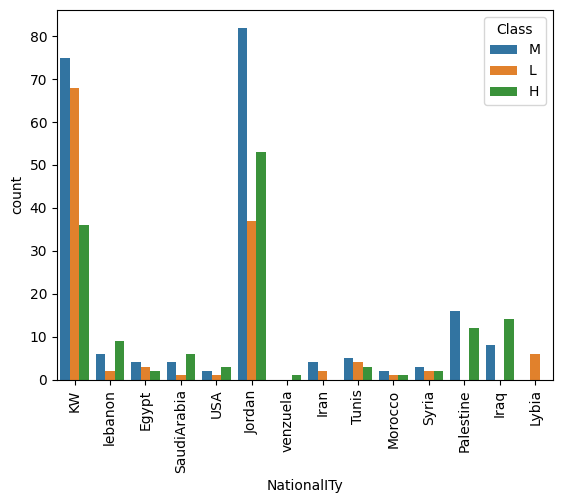

In [8]:
# 3. 시각화를 이용한 탐색적 분석
#  - 수치형 데이터의 탐색적 분석
#    - 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인
#    - 상관계수 확인
#  - 범주형 데이터의 탐색적 분석  - 다음을 bar플롯을 이용해 그려주세요.
#    - 남녀의 성적 비율
#    - 국적에 따른 성적 비율
#    - 과목에 따른 성적 비율
#    - 부모의 설문 참여에 따른 성적 비율

#sns.histplot(data=edu, x='raisedhands', hue='Class')
#sns.barplot(data=edu, x='Class', y='raisedhands', errorbar=None, order=['L', 'M', 'H'])

## 수치 데이터 파악
# sns.histplot(data=edu, x='raisedhands', hue='Class', kde=True) 1
# sns.histplot(data=edu, x='VisITedResources', hue='Class', kde=True) 2
# sns.histplot(data=edu, x='AnnouncementsView', hue='Class', kde=True) 3
# sns.histplot(data=edu, x='Discussion', hue='Class', kde=True) 4

## 범주 데이터 파악

#edu['NationalITy'].value_counts()
#edu['PlaceofBirth'].value_counts()

#edu['NationalITy'] = edu['NationalITy'].replace({'KW' : 'KuwaIT'})

## 성별과 성적 관계
# sns.countplot(data=edu, x='gender', hue='Class')

## 국적과 성적 관계
sns.countplot(data=edu, x='NationalITy', hue='Class')
plt.xticks(rotation=90)
plt.show()

## 

<Axes: xlabel='StudentAbsenceDays', ylabel='count'>

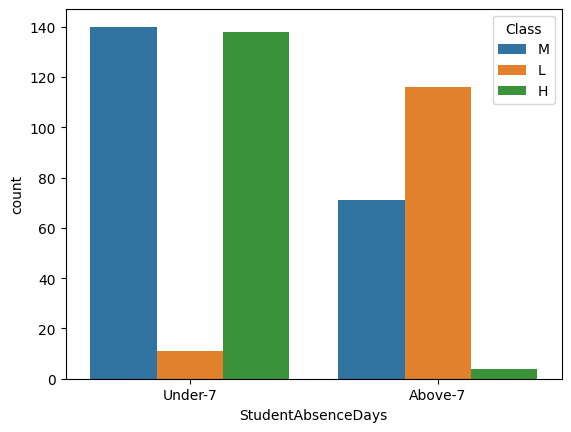

In [9]:
sns.countplot(data=edu, x='StudentAbsenceDays', hue='Class')

## 학생의 성적에 결정적 영향을 미치는 건 내가 봤을 때, 손을 든 횟수와, 교과 과정을 방문, 출석

In [10]:

# 4. 데이터 전처리하기
edu2 = edu.drop(['PlaceofBirth', 'NationalITy', 'StageID', 'GradeID','SectionID', 'Class'], axis=1)
#len(edu['Topic'].unique())
#edu2.info()

edu_cate = edu2.select_dtypes('object')
edu_num = edu2.select_dtypes('int64')
edu_target = edu['Class']

# 인코딩
edu_cate_1hot = pd.get_dummies(edu_cate)
edu_final = pd.concat([edu_num, edu_cate_1hot], axis=1)



In [11]:

# 5. 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(edu_final, edu_target, train_size=0.8, stratify=edu_target, random_state=42)


In [12]:

# 6. 로지스틱 회귀를 이용해 학습하고 평가하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.C = 0.1

lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)


(0.8072916666666666, 0.6979166666666666)

In [13]:
# 교차 검증
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.01, 0.1, 1, 10]
}
gs = GridSearchCV(estimator=lr, param_grid=param_grid , cv=5)


In [14]:
gs.fit(trd, trt)

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.1, max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [15]:
gs.best_params_
best_lr = gs.best_estimator_
best_lr.score(trd, trt), best_lr.score(tsd, tst)

(0.8203125, 0.6979166666666666)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(trt, lr.predict(trd)))
print(classification_report(trt, best_lr.predict(trd)))

              precision    recall  f1-score   support

           H       0.79      0.74      0.76       113
           L       0.88      0.88      0.88       102
           M       0.78      0.80      0.79       169

    accuracy                           0.81       384
   macro avg       0.81      0.81      0.81       384
weighted avg       0.81      0.81      0.81       384

              precision    recall  f1-score   support

           H       0.79      0.79      0.79       113
           L       0.89      0.89      0.89       102
           M       0.79      0.80      0.80       169

    accuracy                           0.82       384
   macro avg       0.83      0.83      0.83       384
weighted avg       0.82      0.82      0.82       384



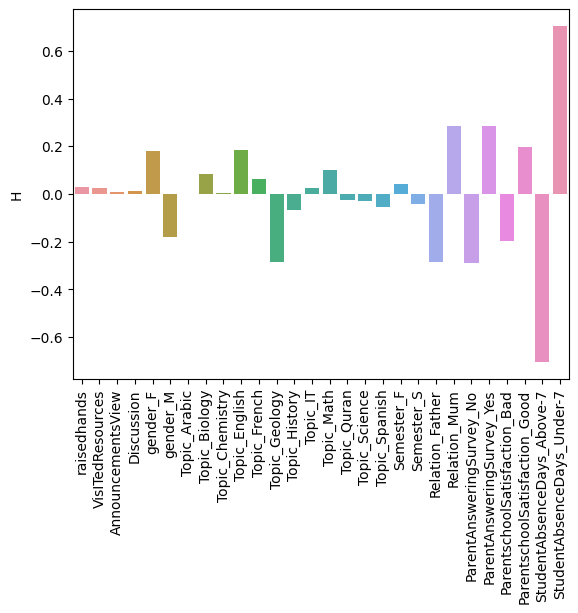

In [17]:
# 7. 높은 성적(H)를 받는 데 영향을 미치는 요인 top3는 무엇인가요?
edu_rst = pd.DataFrame(lr.coef_, columns=trd.columns, index = lr.classes_)

edu_rst.loc['H']

sns.barplot(x=trd.columns, y=edu_rst.loc['H'])
plt.xticks(rotation = 90)
plt.show()



